In [1]:
import numpy as np
import numpy.linalg as lin

In [2]:
w = (3 - 61) / (1-30)
b = 3 - w * 1
print(w, b)

2.0 1.0


In [3]:
x_ = 7
h = w * x_ + b
print(h)

15.0


In [4]:
# 일반 array는 에러 발생
x_ = [1, 2, 3, 4, 5]
h = w * x_ + b
print(h)

TypeError: can't multiply sequence by non-int of type 'float'

In [5]:
# numpy array로 하면 연산 가능
x_ = np.array([1, 2, 3, 4, 5])
h = w * x_ + b
print(h)

[ 3.  5.  7.  9. 11.]


In [6]:
w = 2
b = 1    # h1 = 2 * x + 1

x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 5, 7.3, 9.4, 12, 13.7, 16])

# 가설을 세우고 w, b를 구했을 때, 얼마나 실제 데이터를 잘 표현하는가 계산
h = w * x + b

# 각 점에 대한 오차
print(np.abs(h - y))

# 전체 오차의 합
print(np.sum(np.abs(h - y)))

[0.  0.  0.3 0.4 1.  0.7 1. ]
3.3999999999999995


In [7]:
w = 3
b = 0.1    # h2 = 3 * x + 0.1

x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 5, 7.3, 9.4, 12, 13.7, 16])

# 다른 가설을 세우고 w, b를 구했을 때, 얼마나 실제 데이터를 잘 표현하는가 계산
h = w * x + b

# 각 점에 대한 오차
print(np.abs(h - y))
# 전체 오차의 합
print(np.sum(np.abs(h - y)))

# 오차가 h1보다 상대적으로 크다!
# => h1이 더 좋은 가설이다!

[0.1 1.1 1.8 2.7 3.1 4.4 5.1]
18.300000000000004


## 행렬을 이용한 학습해 구하기

### 정방 행렬에서 최적해 구하기

In [8]:
# 정방행렬
A = np.array([[1, 1],
              [2, 1]])
y = np.array([[2],
              [4.4]])

print(A.shape)
print(y.shape)

(2, 2)
(2, 1)


In [9]:
 # 이건 벡터라서 안됨. 행렬 연산은 항상 2차원 array
_y = np.array([2, 4])
print(_y.shape)

(2,)


In [10]:
# matmul = 행렬곱
# inv = 역행렬 구하기
W = np.matmul(lin.inv(A), y)
print(W)

[[ 2.4]
 [-0.4]]


In [11]:
lin.inv(A)

array([[-1.,  1.],
       [ 2., -1.]])

### 정방 행렬이 아닐 때 최적해 구하기

In [12]:
A = np.array([[1, 1], [2,1], [3,1], [4, 1]])
y = np.array([[2], [4.4], [6.4], [9.8]])

# pinv = (A' * A)-1 A1
A_ = lin.inv(np.matmul(A.T, A))
W = np.matmul(np.matmul(A_, A.T), y)   # traning
print(W)

[[ 2.54]
 [-0.7 ]]


위 계산을 바탕으로 아래와 같은 가설이 도출된다.

h = 2.54 * x - 0.7 

In [13]:
# A 값에 따른 예측값 출력
h = np.matmul(A, W)   # prediction
print(h)

[[1.84]
 [4.38]
 [6.92]
 [9.46]]


In [14]:
RMSE = np.sqrt(np.mean((y-h)**2))
print(RMSE)

0.3209361307176245


## 연습문제 (선형 회귀 알고리즘 구현해보기)

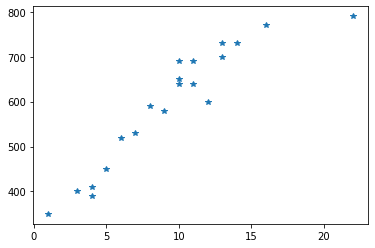

In [15]:
import matplotlib.pyplot as plt

# x: 공부한 시간
# y: 점수
x = np.array([4, 9, 10, 14, 4, 7, 12, 22, 1, 3, 8, 11, 5, 6, 10, 11, 16, 13, 13, 10])
y = np.array([390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 640, 450, 520, 690, 690, 770, 700, 730, 640])
plt.plot(x, y, '*')

### 1번 문제 ] 13, 15, 20 시간 공부하면 SAT는 몇점인지 예측

In [16]:
# w, b가 주어진 상태
w = 20.3
b = 351.2
x = [13, 15, 20]
y = np.array(x) * w + b
print(y)

[615.1 655.7 757.2]


### 2번 문제 ] SAT 840점을 얻기 위해 몇 시간 공부해야하는가?

In [17]:
y = 840
x = (y - b) / w
print(y)
print(b)

840
351.2


### 3번 문제 ] 추정 w, b로부터 발생하는 학습 오차는 얼마인가? (RMSE)

In [18]:
# x와 y를 각각 이차원 행렬로 만들기
# 맨 바깥쪽을 []로 감싸고, T 해주면 각각 []로 감싸는 노가다 안해도됨!
x = np.array([[4, 9, 10, 14, 4, 7, 12, 22, 1, 3, 8, 11, 5, 6, 10, 11, 16, 13, 13, 10]]).T
y = np.array([[390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 640, 450, 520, 690, 690, 770, 700, 730, 640]]).T

print(x.shape)
print(y.shape)

(20, 1)
(20, 1)


In [19]:
error = (y - (x * w + b)) ** 2
result = np.sqrt(np.mean(error))

print(result)

72.56996968443626


### 최적의 가중치 w, b는 얼마인가?

In [20]:
# 1로 구성된 행렬을 x와 같은 길이로 생성해줘
# np.ones((x.shape[0], 1))

# x랑 1행렬이랑 합치기
A = np.append(x, np.ones((x.shape[0], 1)), axis = 1)
# print(A)
print(A.shape)
W = np.matmul(lin.pinv(A), y)    # (A'T*A)-1*A'
print(W)

(20, 2)
[[ 25.32646778]
 [353.1648795 ]]


In [21]:
# 이전 모델보다 좋은가?

In [22]:
w = W[0]
b = W[1]
error2 = (y - (x * w +b)) ** 2
# error2 = (y - np.matmul(A, W))**2
result2 = np.sqrt(np.mean(error2))

print(result)
print(result2)

72.56996968443626
47.1664900003957


### 잘 학습됐는지 시각화

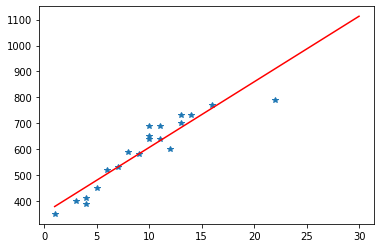

In [23]:
plt.plot(x[:,0], y[:,0], '*') # [:,0] 모든 행을 다 가져오고 0번째 열만 가져와라
# print(x[:,0])

x_ = np.linspace(1, 30, 60)   # 1부터 30까지의 구간에 60개의 점을 만들어라
# print(x_)

h = x_ * w +b
plt.plot(x_, h, 'r')

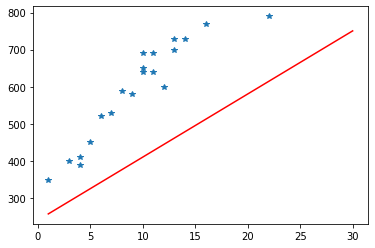

In [24]:
plt.plot(x[:,0], y[:,0], '*')
w = 17
b = 240.6
x_ = np.linspace(1, 30, 60)   # 1부터 30까지의 구간에 60개의 점을 만들어라
h = x_ * w +b
plt.plot(x_, h, 'r')

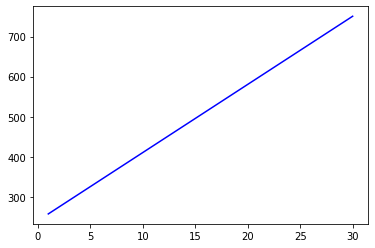

In [25]:
plt.plot(x_, h, 'b')

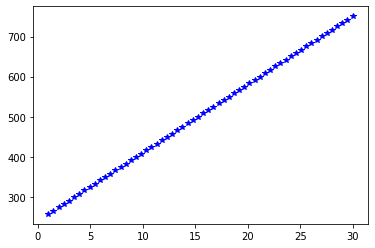

In [26]:
plt.plot(x_, h, 'b*')

## 연습문제 (차원 변형을 통한 분류)

In [41]:
# 차원이 늘어난다고 행렬의 차원이 늘어나는게 x 행렬은 항상 2차원
Interest_Rate =  np.array([[2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75]]).T
Unemployment_Rate = np.array([[5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1]]).T
Stock_Index_Price =  [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]

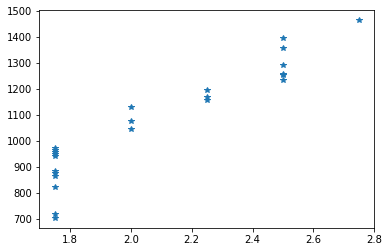

In [28]:
# 주식과 이자율은 비례관계인것으로 보여짐
plt.plot(Interest_Rate[:,0], Stock_Index_Price, '*')

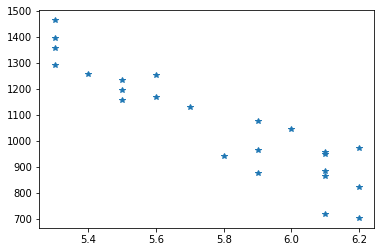

In [29]:
# 실업률과 주식은 반비례관계로 보임
plt.plot(Unemployment_Rate[:,0], Stock_Index_Price, '*')

In [45]:
A = np.append(Interest_Rate, Unemployment_Rate, axis=1)
A = np.append(A, np.ones((A.shape[0], 1)), axis=1)
A

array([[2.75, 5.3 , 1.  ],
       [2.5 , 5.3 , 1.  ],
       [2.5 , 5.3 , 1.  ],
       [2.5 , 5.3 , 1.  ],
       [2.5 , 5.4 , 1.  ],
       [2.5 , 5.6 , 1.  ],
       [2.5 , 5.5 , 1.  ],
       [2.25, 5.5 , 1.  ],
       [2.25, 5.5 , 1.  ],
       [2.25, 5.6 , 1.  ],
       [2.  , 5.7 , 1.  ],
       [2.  , 5.9 , 1.  ],
       [2.  , 6.  , 1.  ],
       [1.75, 5.9 , 1.  ],
       [1.75, 5.8 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 6.2 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 6.1 , 1.  ],
       [1.75, 5.9 , 1.  ],
       [1.75, 6.2 , 1.  ],
       [1.75, 6.2 , 1.  ],
       [1.75, 6.1 , 1.  ]])

In [46]:
W = np.matmul(lin.pinv(A), Stock_Index_Price)
print(W)

[ 345.54008701 -250.14657137 1798.40397763]


In [47]:
# 4개의 샘플에서 1개이 데이터 예측
x_data = np.array([
    [5.1, 6.2, 1],
    [5.1, 6.1, 1],
    [5.1, 6.2, 1],
    [5.2, 6.2, 1]])
result = np.matmul(x_data, W)
print(result)

[2009.74967889 2034.76433603 2009.74967889 2044.30368759]


In [48]:
from mpl_toolkits import mplot3d
%matplotlib qt5

In [49]:
fig = plt.figure()
ax = plt.axes(projection = "3d")

ax.scatter3D(Interest_Rate[:,0], Unemployment_Rate[:,0], Stock_Index_Price)

In [35]:
# A = np.append(Interest_Rate, np.ones((A.shape[0], 1)), axis=1)
# A = np.append(A, Unemployment_Rate, axis=1)

# W = np.matmul(lin.pinv(A), Stock_Index_Price)

# # 이런식으로 순서 바꿔도 상관 없음 (y = ax + b 나 y = b + ax나 똑같기 때문)
# # 다만 데이터 순서에 맞춰서 잘 참조해야한다

In [50]:
xx, yy = np.mgrid[0.5:3:0.1, 5:7:0.1]
grid = np.c_[xx.flatten(), yy.flatten()]

x_ = np.append(grid, np.ones((grid.shape[0] , 1)) , axis = 1)
print(x_)
result = np.matmul(x_, W)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(Interest_Rate[:,0],Unemployment_Rate[:,0], Stock_Index_Price, 'b')
ax.scatter3D(xx.flatten(), yy.flatten(), result, 'r')

[[0.5 5.  1. ]
 [0.5 5.1 1. ]
 [0.5 5.2 1. ]
 ...
 [2.9 6.7 1. ]
 [2.9 6.8 1. ]
 [2.9 6.9 1. ]]


In [37]:
xx, yy = np.mgrid[1:3:0.5, -4:-2:0.5]
print(xx)
print(yy)

[[1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5]
 [2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5]]
[[-4.  -3.5 -3.  -2.5]
 [-4.  -3.5 -3.  -2.5]
 [-4.  -3.5 -3.  -2.5]
 [-4.  -3.5 -3.  -2.5]]


In [38]:
print(xx.flatten())  # 2차원 배열을 1차원으로 만듦
grid = np.c_[xx.flatten(), yy.flatten()]  # 두 배열을 조합해서 하나로 만듦
print(grid)

[1.  1.  1.  1.  1.5 1.5 1.5 1.5 2.  2.  2.  2.  2.5 2.5 2.5 2.5]
[[ 1.  -4. ]
 [ 1.  -3.5]
 [ 1.  -3. ]
 [ 1.  -2.5]
 [ 1.5 -4. ]
 [ 1.5 -3.5]
 [ 1.5 -3. ]
 [ 1.5 -2.5]
 [ 2.  -4. ]
 [ 2.  -3.5]
 [ 2.  -3. ]
 [ 2.  -2.5]
 [ 2.5 -4. ]
 [ 2.5 -3.5]
 [ 2.5 -3. ]
 [ 2.5 -2.5]]
